# Spam Filtering

In [2]:
import pandas as pd

df = pd.read_csv("ham-spam.csv")
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [3]:
df.groupby("IsSpam").describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [4]:
df.drop_duplicates(inplace=True)
df.groupby("IsSpam").describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words="english")

X = vectorizer.fit_transform(df["Text"])
y = df["IsSpam"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

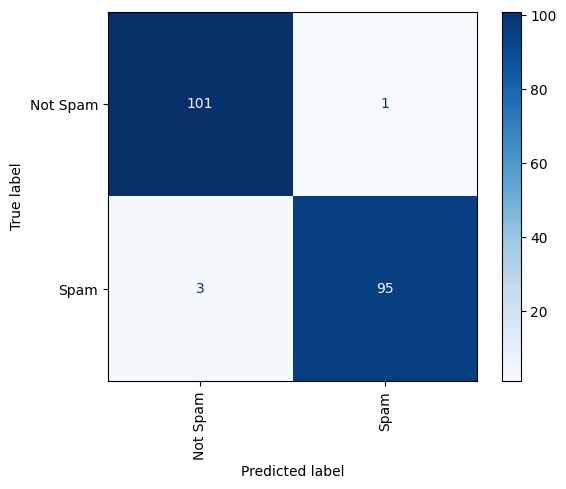

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=["Not Spam", "Spam"],
    cmap="Blues",
    xticks_rotation="vertical",
);

In [10]:
model.score(X_test, y_test)

0.98

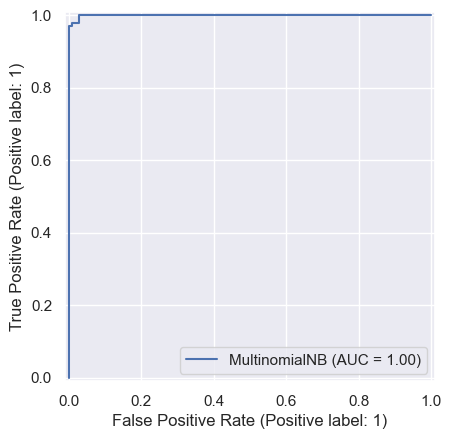

In [13]:
import seaborn as sns
from sklearn.metrics import RocCurveDisplay as rcd

sns.set()

rcd.from_estimator(model, X_test, y_test);

In [15]:
msg = "can you attend a code review on Tuesday to make sure the logic is solid?"
input = vectorizer.transform([msg])
model.predict(input)[0]

np.int64(0)

In [18]:
model.predict_proba(input)[0][0]

np.float64(0.9999497111473539)

In [19]:
msg = "Why pay more for expensive meds when you can order them online and save $$$"
input = vectorizer.transform([msg])
model.predict(input)[0]

np.int64(1)

In [20]:
model.predict_proba(input)[0][0]  # probability not spam

np.float64(0.00021423891260677753)

In [21]:
model.predict_proba(input)[0][1]  # probability spam

np.float64(0.9997857610873945)